
[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [66]:
train_path = 'D:/strokeds/Stroke Dataset V2/labels/labwlyo.csv'

In [67]:
train = pd.read_csv(train_path)

In [68]:
train.head()

,x:image,y
0,hemorrhagic (1).png,0
1,hemorrhagic (10).png,0
2,hemorrhagic (11).png,0
3,hemorrhagic (12).png,0
4,hemorrhagic (13).png,0


In [69]:
train_image = []


In [70]:
for i in tqdm(range(train.shape[0])):
    img = image.load_img('D:/strokeds/Stroke Dataset V2/ds/training/'+train['x:image'][i], target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]D:\conda\envs\jup\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 136.97it/s]


In [71]:
y = train['y'].values
y = to_categorical(y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [73]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [74]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [75]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
3/3 [==============================] - 1s 180ms/step - loss: 0.7482 - accuracy: 0.4250 - val_loss: 0.6461 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 69ms/step - loss: 0.6649 - accuracy: 0.6000 - val_loss: 0.6828 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 79ms/step - loss: 0.6503 - accuracy: 0.6375 - val_loss: 0.6446 - val_accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - 0s 77ms/step - loss: 0.5772 - accuracy: 0.7625 - val_loss: 0.6207 - val_accuracy: 0.7000
Epoch 5/100
3/3 [==============================] - 0s 97ms/step - loss: 0.5545 - accuracy: 0.7500 - val_loss: 0.6044 - val_accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 75ms/step - loss: 0.4840 - accuracy: 0.8000 - val_loss: 0.6104 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 75ms/step - loss: 0.4987 - accuracy: 0.7750 - val_loss: 0.5102 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

In [76]:
test_path = 'D:/strokeds/Stroke Dataset V2/labels/labelstest2.csv'

In [77]:
test_file = pd.read_csv(test_path)

In [78]:
test_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('D:/strokeds/Stroke Dataset V2/ds/test/'+test_file['x:image'][i], target_size=(28,28,1), color_mode="grayscale")
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(train_image)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 155.94it/s]


In [79]:
prediction = model.predict(test)
predicted_classes = np.argmax(prediction, axis=1)


4/4 [==============================] - 0s 9ms/step


In [80]:
print(predicted_classes)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [81]:
sample = pd.read_csv('D:/strokeds/Stroke Dataset V2/labels/labelstest2.csv')
sample['filename'] = test_file['x:image']
sample['label'] = predicted_classes
sample.to_csv('D:/strokeds/Stroke Dataset V2/labels/sample2.csv', header=True, index=False)

In [82]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
3/3 [==============================] - 0s 95ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9350 - val_accuracy: 0.8000
Epoch 2/200
3/3 [==============================] - 0s 78ms/step - loss: 5.4303e-04 - accuracy: 1.0000 - val_loss: 0.9479 - val_accuracy: 0.8000
Epoch 3/200
3/3 [==============================] - 0s 71ms/step - loss: 3.3276e-04 - accuracy: 1.0000 - val_loss: 0.9622 - val_accuracy: 0.8000
Epoch 4/200
3/3 [==============================] - 0s 77ms/step - loss: 5.7412e-04 - accuracy: 1.0000 - val_loss: 0.9878 - val_accuracy: 0.7500
Epoch 5/200
3/3 [==============================] - 0s 81ms/step - loss: 4.2950e-04 - accuracy: 1.0000 - val_loss: 1.0265 - val_accuracy: 0.7500
Epoch 6/200
3/3 [==============================] - 0s 81ms/step - loss: 5.3624e-04 - accuracy: 1.0000 - val_loss: 1.0499 - val_accuracy: 0.7500
Epoch 7/200
3/3 [==============================] - 0s 76ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9961 - val_accuracy: 0.7500


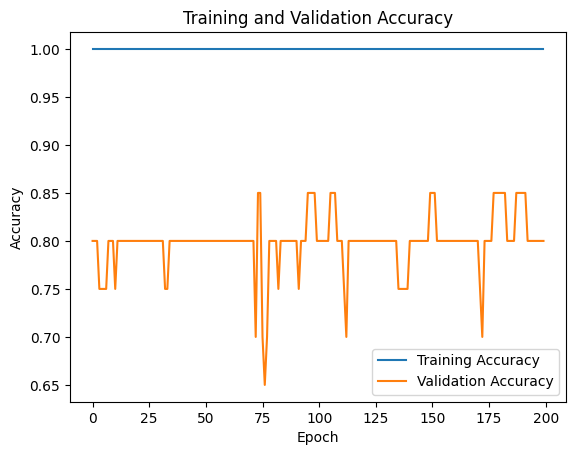

In [83]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [64]:
plt.savefig('D:/strokeds/Stroke Dataset V2/graphs/accuracy.png')


<Figure size 640x480 with 0 Axes>